**New York City Taxi Trip Duration Analysis**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


Import the data from a csv file

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/taxi_trip_dataset/train.csv')

Explore Data

In [ ]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


Checking for null values

In [ ]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no Null Values

1. Id
There are 1393253 Unique id's which represent each row in the data

In [ ]:
df.shape

(1458644, 11)

2. Vender Id
A code indicating the provider associated with the trip record

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:

#Calculate and assign new columns to the dataframe such as weekday,
#month and pickup_hour which will help us to gain more insights from the data.
df['weekday'] = df.pickup_datetime.dt.day_name()
df['month'] = df.pickup_datetime.dt.month
df['weekday_num'] = df.pickup_datetime.dt.weekday
df['pickup_hour'] = df.pickup_datetime.dt.hour

Univariate Analysis


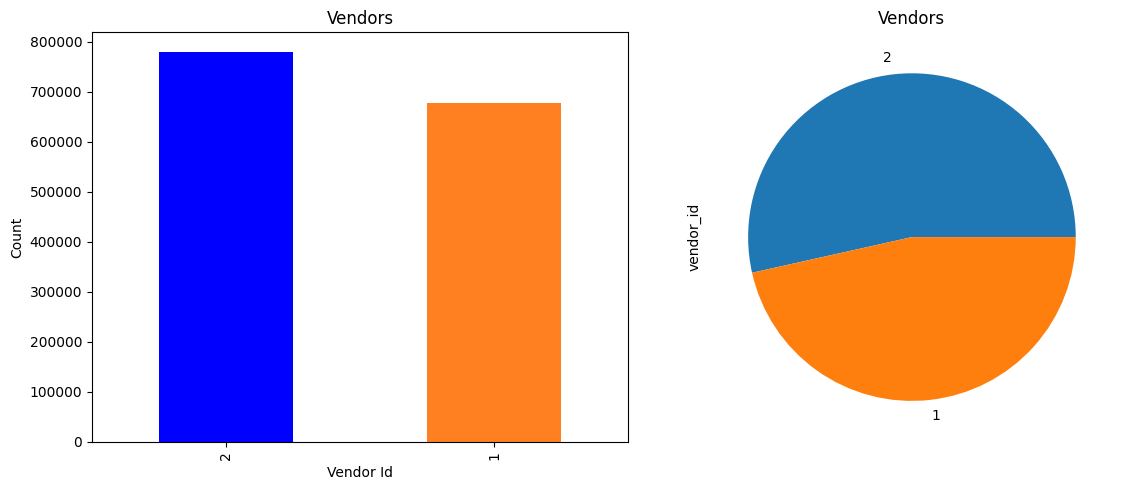

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = df['vendor_id'].value_counts().plot(kind='bar',title="Vendors",ax=axes[0],color = ('blue',(1, 0.5, 0.13)))
df['vendor_id'].value_counts().plot(kind='pie',title="Vendors",ax=axes[1])
ax.set_ylabel("Count")
ax.set_xlabel("Vendor Id")
fig.tight_layout()


Here we got to know that there are only 2 venders(1 and 2)
Both the venders share almost equal amount of trips, the difference is quite low between two venders
But Vendor 2 is evidently more famous among the population as per the above graphs.

3.Passengers
New York City Taxi Passenger Limit says:

A maximum of 4 passengers can ride in traditional cabs.
A child under 7 is allowed to sit on a passenger's lap in the rear seat in addition to the passenger limit.
So, in total we can assume that maximum 5 passenger can board the new york taxi i.e. 4 adult + 1 mino

In [ ]:
pd.options.display.float_format = '{:.2f}'.format #To suppress scientific notation.
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

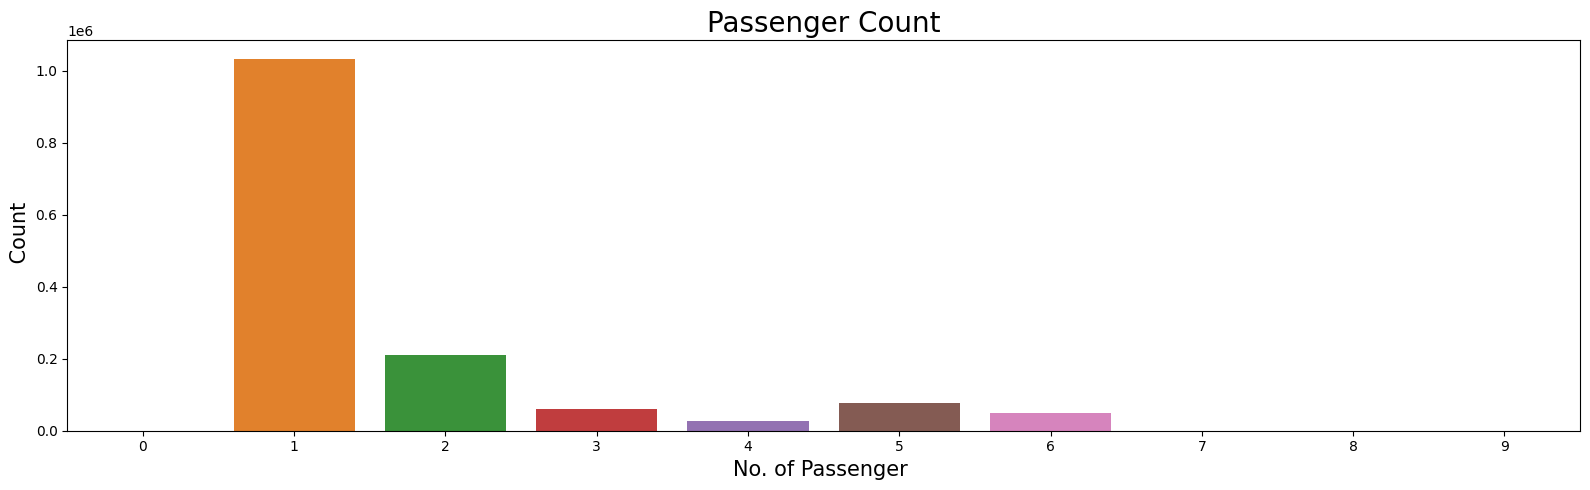

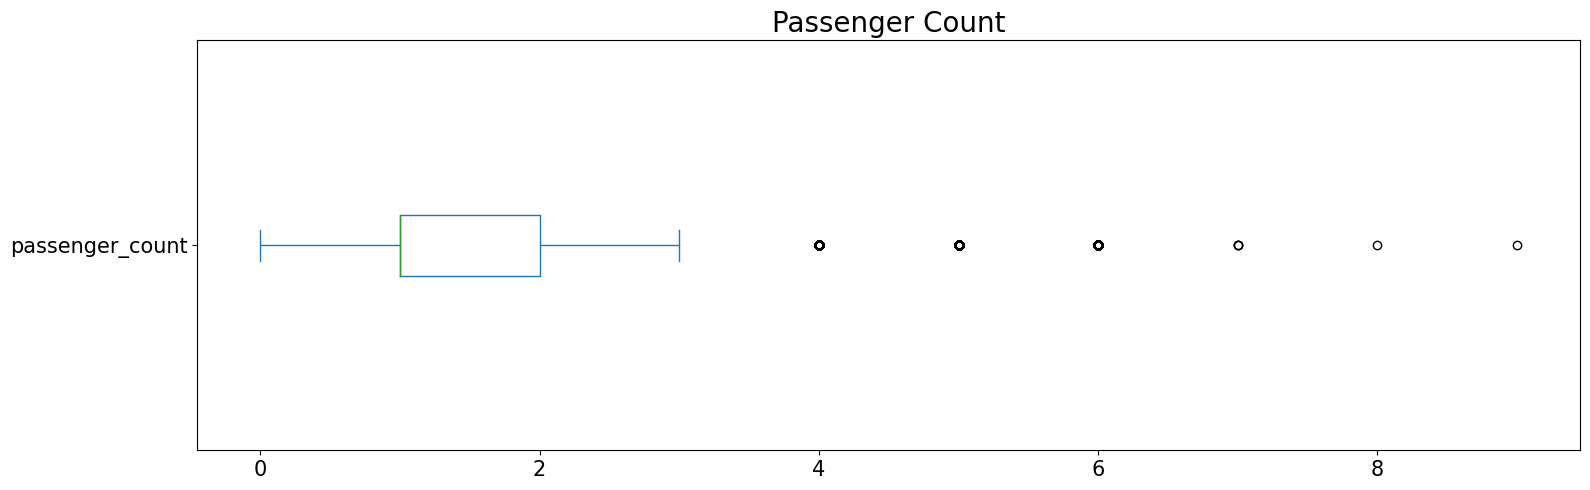

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
#line = df['passenger_count'].value_counts().plot(kind='bar',fontsize = 15)
line = sns.countplot(data=df , x=df.passenger_count)
line.set_ylabel(" Count",fontsize = 15)
line.set_xlabel("No. of Passenger ",fontsize = 15)
line.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
box = df['passenger_count'].plot(kind='box',vert = False,fontsize = 15)
box.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()

There are some trips with 0 passenger count.
Few trips consisted of even 6, 7, 8 or 9 passengers. Clear outliers and pointers to data inconsistency
Most of trip consist of passenger either 1 or 2.

4.Trip duration

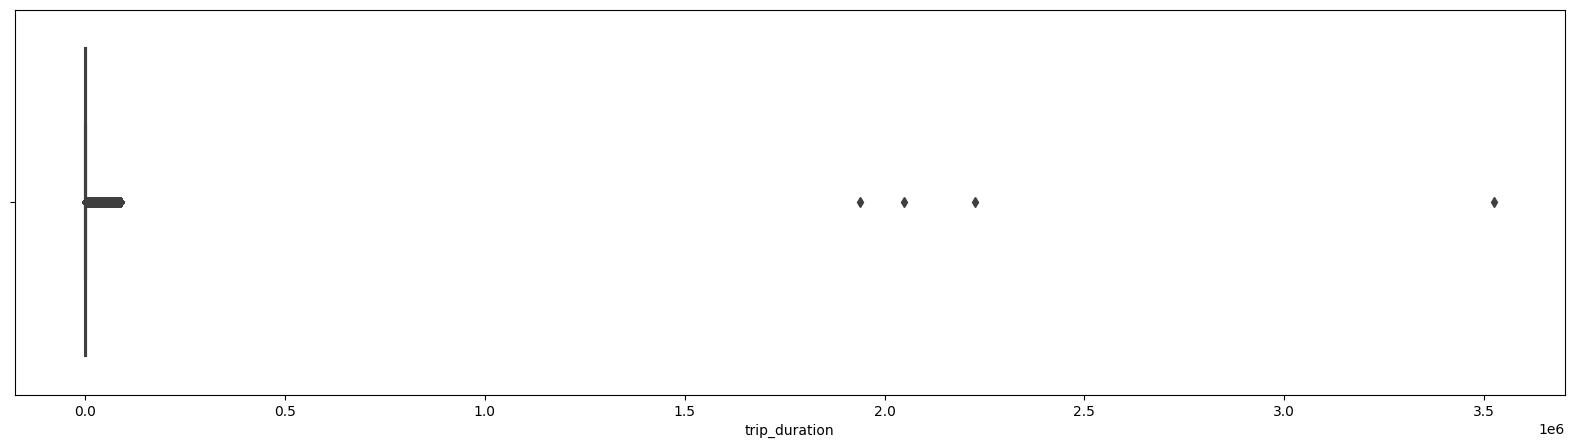

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(data=df,x=df.trip_duration)
plt.show()

Some trip durations are over 100000 seconds which are clear outliers and should be removed.
There are some durations with as low as 1 second. which points towards trips with 0 km distance.
Major trip durations took between 10-20 mins to complete.
Mean and mode are not same which shows that trip duration distribution is skewed towards right

In [ ]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,max(df.trip_duration),3600))).count()

trip_duration
(1, 3601]             1446313
(3601, 7201]            10045
(7201, 10801]             141
(10801, 14401]             35
(14401, 18001]              5
                       ...   
(3506401, 3510001]          0
(3510001, 3513601]          0
(3513601, 3517201]          0
(3517201, 3520801]          0
(3520801, 3524401]          0
Name: trip_duration, Length: 979, dtype: int64

These trips ran for more than 20 days, which seems unlikely by the distance travelled.
All the trips are taken by vendor 1 which points us to the fact that this vendor might allows much longer trip for outstations.
All these trips are either taken on Tuesday's in 1st month or Saturday's in 2nd month. There might be some relation with the weekday, pickup location, month and the passenger.
But they fail our purpose of correct prediction and bring inconsistencies in the algorithm calculation.

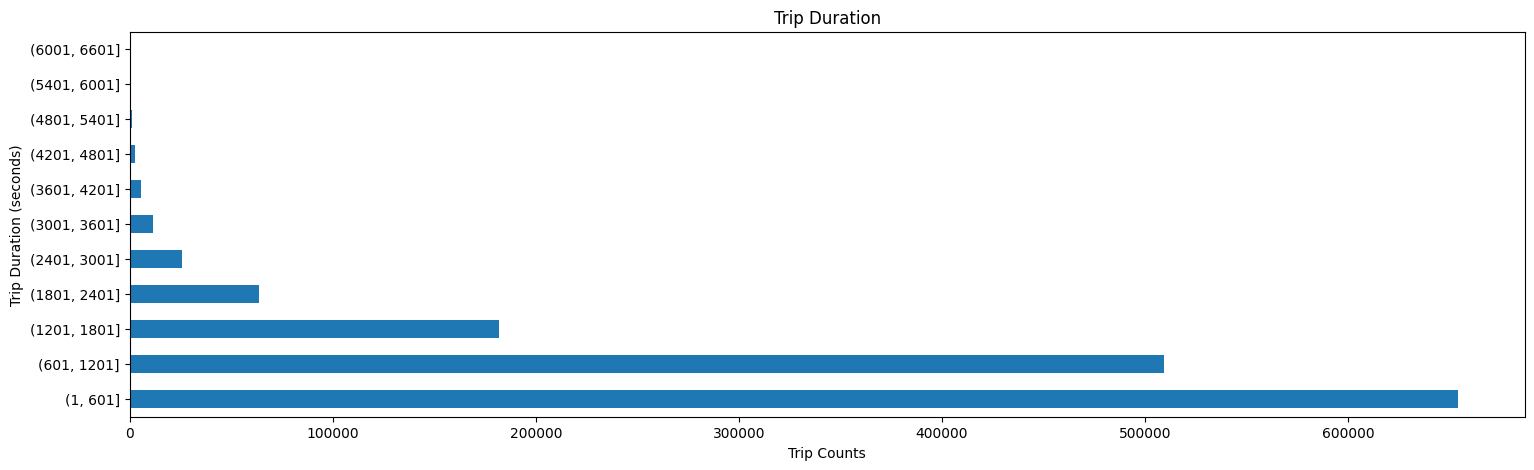

In [ ]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh',figsize = (18,5))
plt.title('Trip Duration')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

We can observe that most of the trips took 0 - 30 mins to complete i.e. approx 1800 secs

Total trips per weekday

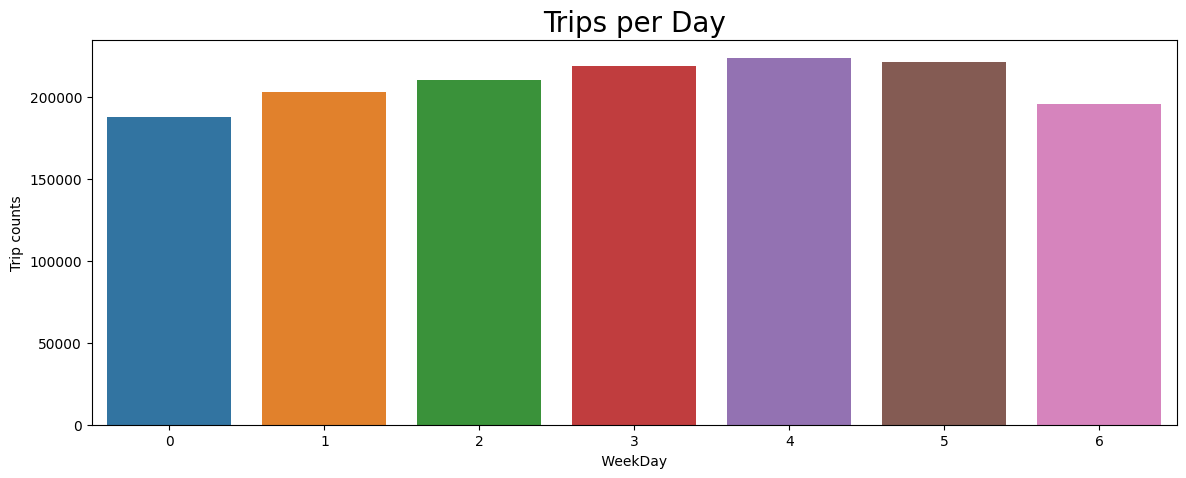

In [ ]:
plt.figure(figsize = (14,5))
sns.countplot(data=df,x=df.weekday_num)
plt.xlabel(' WeekDay ')
plt.ylabel('Trip counts')
plt.title('Trips per Day',fontsize = 20)
plt.show()

Here we can see an increasing trend of taxi pickups starting from Monday till Friday. The trend starts declining from saturday till monday which is normal where some office going people likes to stay at home for rest on the weekends.

9.Total trips per month

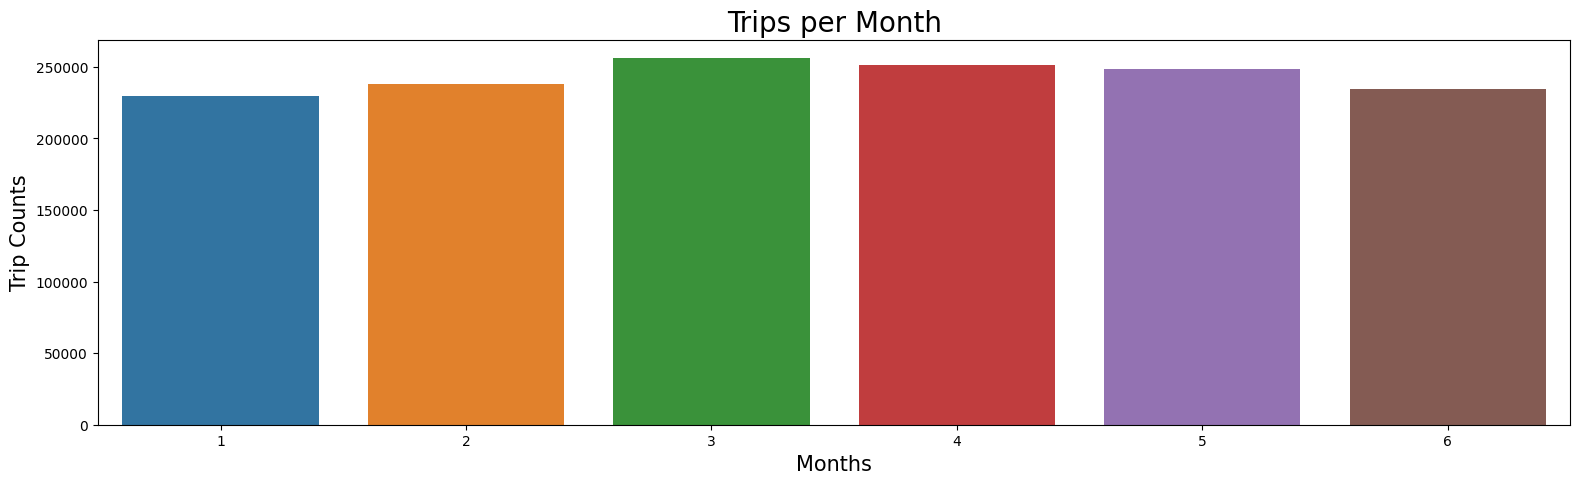

In [ ]:
plt.figure(figsize = (19,5))
sns.countplot(data=df,x=df.month)
plt.ylabel('Trip Counts',fontsize = 15)
plt.xlabel('Months',fontsize = 15)
plt.title('Trips per Month',fontsize = 20)
plt.show()


Quite a balance across the months here. It could have been more equivalent if we wouldn't have removed the inconsistent records in our study of the univariate analysis

# **Bivariate** **Analysis**

Bivariate analysis is used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y.

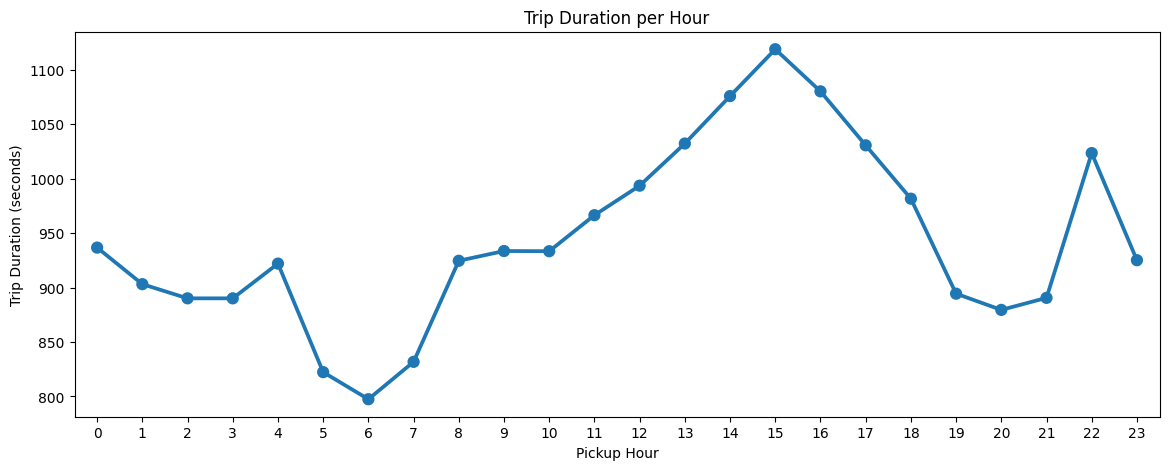

In [ ]:
plt.figure(figsize = (14,5))
group1 = df.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(x=group1.index, y=group1.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.title('Trip Duration per Hour')
plt.show()

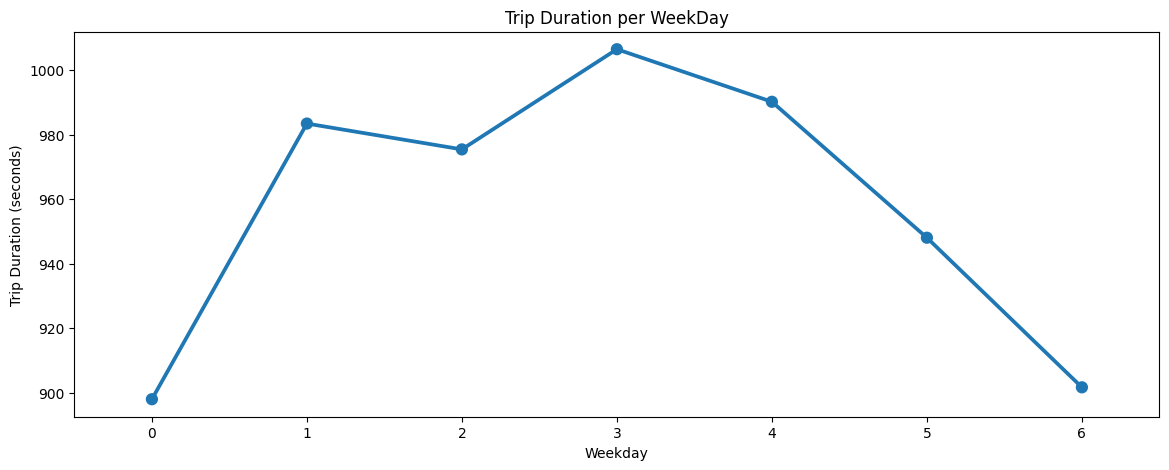

In [ ]:
plt.figure(figsize = (14,5))
group2 = df.groupby('weekday_num').trip_duration.mean()
sns.pointplot(x=group2.index, y=group2.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.title('Trip Duration per WeekDay')
plt.show()

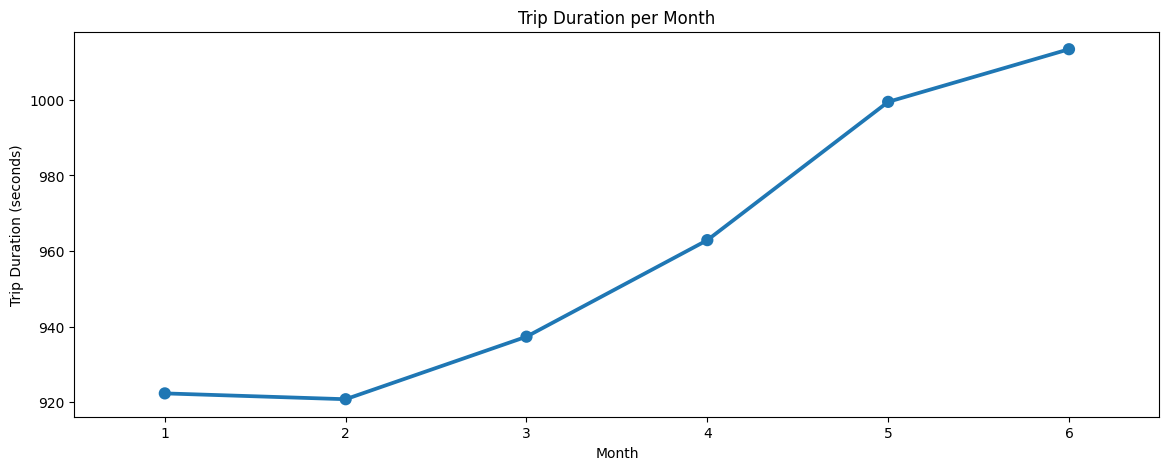

In [ ]:
plt.figure(figsize = (14,5))
group3 = df.groupby('month').trip_duration.mean()
sns.pointplot(x=group3.index,y= group3.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Month')
plt.title('Trip Duration per Month')
plt.show()

Trip duration per vendor

We can also look at the average difference between the trip duration for each vendor. However we do know that vendor 2 has larger share of the market. Let's visualize.

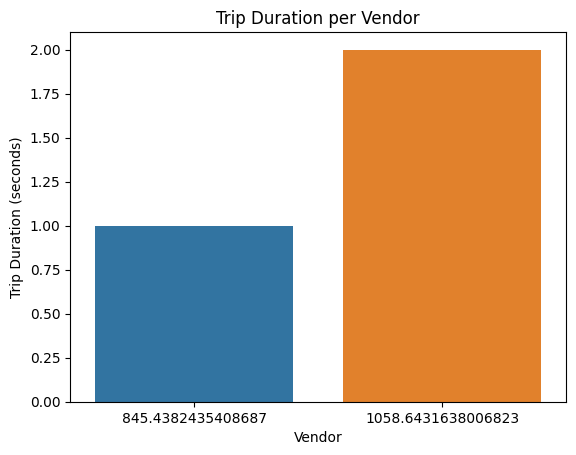

In [ ]:
group4 = df.groupby('vendor_id').trip_duration.mean()
sns.barplot(x=group4.values, y=group4.index)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor')
plt.title('Trip Duration per Vendor')
plt.show()


12.Passenger count per vendor

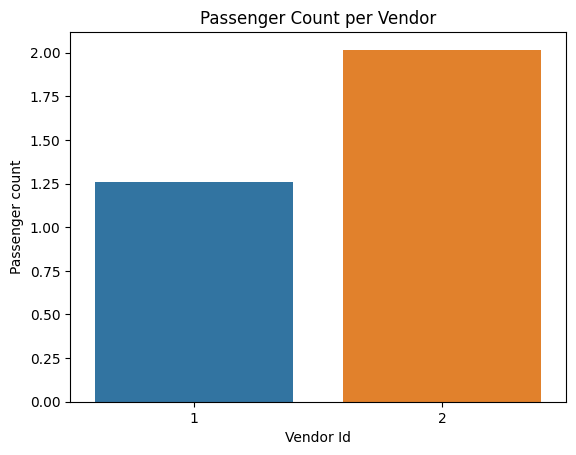

In [ ]:
group9 = df.groupby('vendor_id').passenger_count.mean()
sns.barplot(x=group9.index, y=group9.values)
plt.ylabel('Passenger count')
plt.xlabel('Vendor Id')
plt.title('Passenger Count per Vendor')
plt.show()